## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Read Data

In [2]:
stock_ntr = pd.read_csv('NTR.csv')
stock_ntr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,46.209999,46.990002,45.855000,46.259998,40.076603,1289100
1,2019-01-03,46.000000,46.099998,44.882999,45.049999,39.028339,1158800
2,2019-01-04,45.950001,47.180000,45.880001,47.130001,40.830311,1538500
3,2019-01-07,47.310001,48.110001,46.840000,47.740002,41.358780,954700
4,2019-01-08,48.709999,49.480000,48.520000,49.209999,42.632286,1921800
...,...,...,...,...,...,...,...
1113,2023-06-05,55.240002,55.770000,54.430000,55.349998,55.349998,3880800
1114,2023-06-06,53.000000,57.294998,52.820000,57.220001,57.220001,6397900
1115,2023-06-07,57.610001,59.750000,57.520000,59.340000,59.340000,2925500
1116,2023-06-08,59.400002,60.080002,57.910000,58.939999,58.939999,2828400


## Analyst

### Describe

In [3]:
stock_ntr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1.118000e+03
mean,60.511244,61.377292,59.623557,60.496458,57.285770,2.081464e+06
std,18.426525,18.839228,18.013385,18.436037,19.372984,1.215498e+06
min,24.820000,26.750999,23.848000,25.100000,22.519360,4.274000e+05
25%,48.509998,48.948750,48.122500,48.492501,43.099749,1.296650e+06
50%,55.445000,55.940000,54.614999,55.274999,52.479140,1.758400e+06
75%,73.514998,74.610001,72.409998,73.385000,72.485258,2.570375e+06
max,113.760002,117.250000,111.910004,114.500000,111.642052,1.133740e+07


### Visualization

#### Histogram

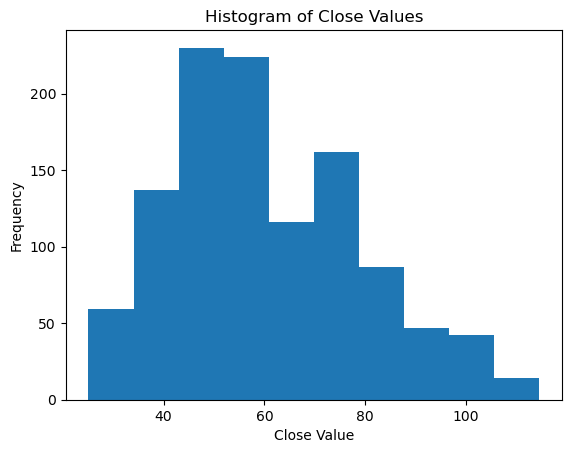

In [4]:
plt.hist(stock_ntr['Close'])

plt.title("Histogram of Close Values")
plt.xlabel("Close Value")
plt.ylabel("Frequency")

plt.show()

#### Boxplot

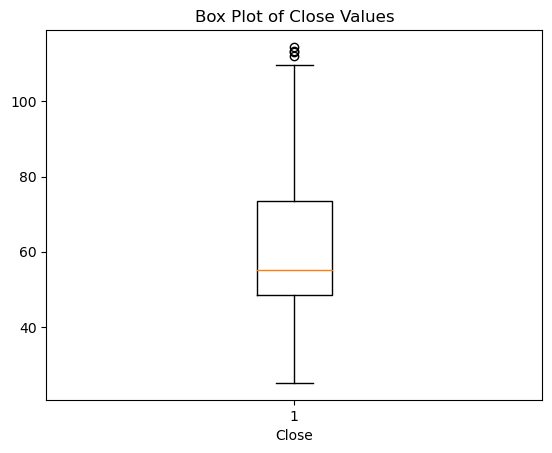

In [5]:
plt.boxplot(stock_ntr['Close'])

plt.title("Box Plot of Close Values")
plt.xlabel("Close")

plt.show()

#### Initial Close Values

In [6]:
# Convert the 'Date' column to datetime format
stock_ntr['Date'] = pd.to_datetime(stock_ntr['Date'])

# Set the 'Date' column as the index value
stock_ntr = stock_ntr.set_index(pd.DatetimeIndex(stock_ntr['Date'].values))

# Delete Date from Dataframe
stock_ntr = stock_ntr.drop('Date', axis=1)

In [ ]:
decomposition = sm.tsa.seasonal_decompose(stock_ntr['Close'], model='add', period=30)

# Plotting the components
fig, ax = plt.subplots(4,1, figsize=(10,8))
ax[0].plot(decomposition.observed)
ax[0].set_ylabel('Observed')
ax[1].plot(decomposition.trend)
ax[1].set_ylabel('Trend')
ax[2].plot(decomposition.seasonal)
ax[2].set_ylabel('Seasonal')
ax[3].plot(decomposition.resid)
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

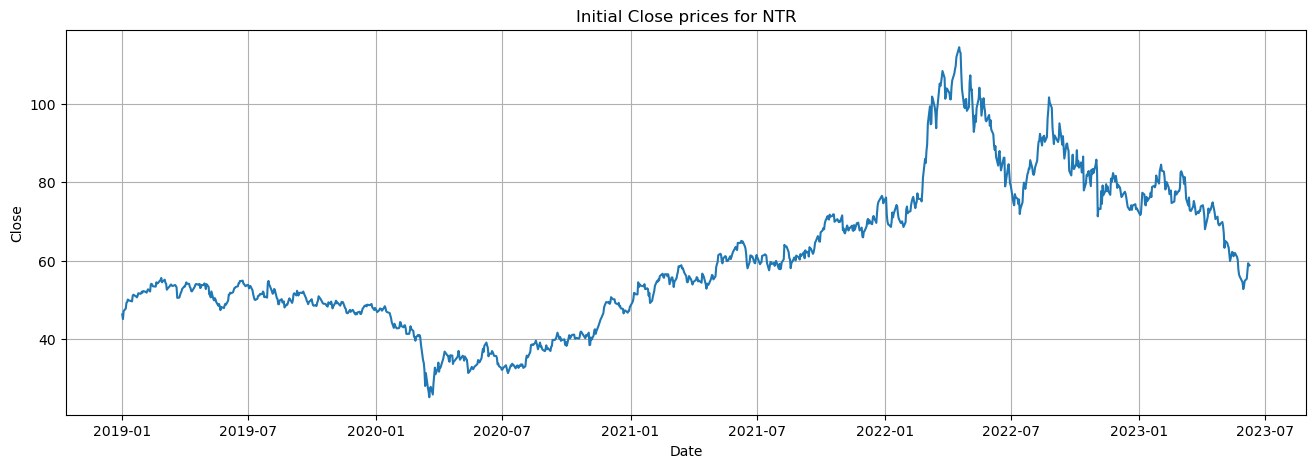

In [7]:
plt.figure(figsize=(16,5))

plt.plot(stock_ntr.index, stock_ntr['Close'])

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Initial Close prices for NTR')
plt.grid()
plt.show()